# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

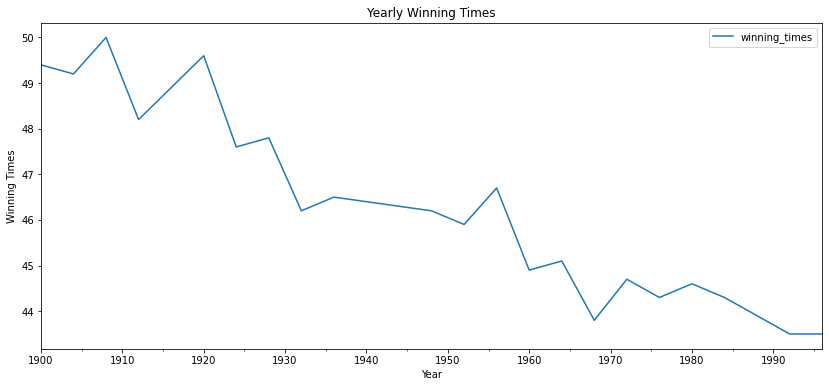

In [3]:
# Plot the time series

ax = data.plot(figsize=(14,6))
ax.set_ylabel("Winning Times")
ax.set_xlabel("Year")
ax.set_title('Yearly Winning Times')
plt.show();

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff

,winning_times
year,
1900,NaN
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3


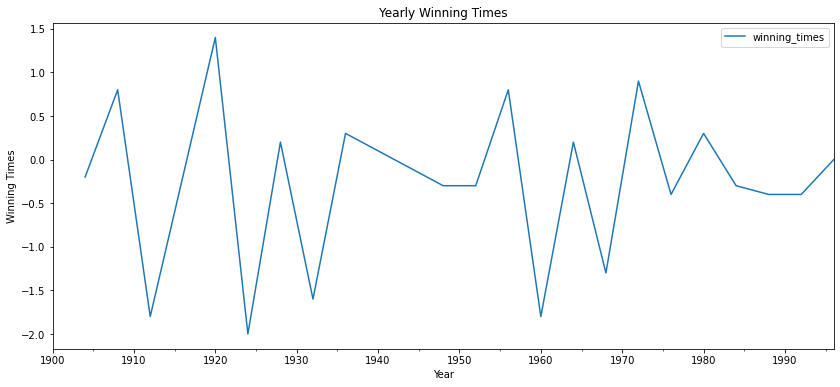

In [5]:
# Plot the time series of data_diff
ax = data_diff.plot(figsize=(14,6))
ax.set_ylabel("Winning Times")
ax.set_xlabel("Year")
ax.set_title('Yearly Winning Times')
plt.show();

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

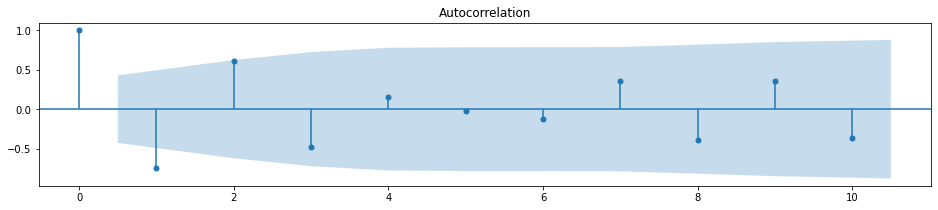

In [6]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

data_diff = data_diff.dropna()
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=10);


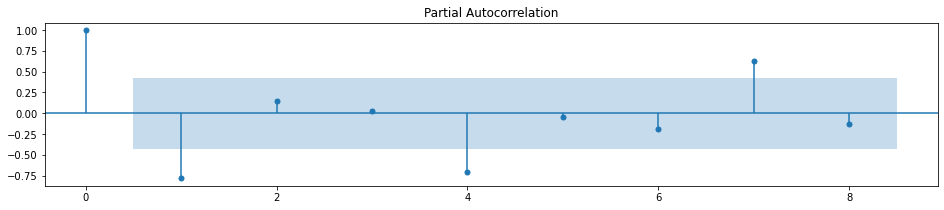

In [7]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

Below, i will start by instantiating an ARIMA model with the order (1,0,1) which the first value being the p value which represents the AR model and the last value is the q value that represents the MA model.

In [8]:
# import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# fit the model on the differenced data(data_diff)
first_model = ARIMA(data_diff, order=(1,0,1))
first_arima_model = first_model.fit()

In [9]:
first_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.958
Date:                Sun, 28 Aug 2022   AIC                             47.916
Time:                        22:39:47   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2850      0.087     -3.266      0.001      -0.456      -0.114
ar.L1         -0.7707      0.177     -4.350      0.000      -1.118      -0.423
ma.L1          0.1172      0.285      0.412      0.680      -0.441       0.675
sigma2         0.3784      0.181      2.094      0.036       0.024       0.733
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.90   Prob(JB):                         0.54
Heteroskedasticity (H):               0.31   Skew:                             0.23
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# fit the model on the differenced data(data_diff)
second_model = ARIMA(data_diff, order=(1,0,0))
second_arima_model = second_model.fit()

In [11]:
second_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Sun, 28 Aug 2022   AIC                             46.107
Time:                        22:39:47   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.034       0.029       0.735
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.84   Prob(JB):                         0.55
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# fit the model on the differenced data(data_diff)
third_model = ARIMA(data_diff, order=(2,0,1))
third_arima_model = third_model.fit()

In [13]:
third_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Sun, 28 Aug 2022   AIC                             49.862
Time:                        22:39:47   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6103      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1279      1.848      0.069      0.945      -3.494       3.750
ma.L1         -0.0207      2.564     -0.008      0.994      -5.046       5.004
sigma2         0.3774      0.181      2.088      0.037       0.023       0.732
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.83   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# fit the model on the differenced data(data_diff)
forth_model = ARIMA(data_diff, order=(2,0,0))
forth_arima_model = forth_model.fit()

In [15]:
forth_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -19.931
Date:                Sun, 28 Aug 2022   AIC                             47.863
Time:                        22:39:47   BIC                             52.041
Sample:                    12-31-1904   HQIC                            48.770
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2835      0.090     -3.152      0.002      -0.460      -0.107
ar.L1         -0.6307      0.208     -3.031      0.002      -1.039      -0.223
ar.L2          0.1132      0.212      0.534      0.593      -0.302       0.529
sigma2         0.3774      0.180      2.094      0.036       0.024       0.731
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.83   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# fit the model on the differenced data(data_diff)
fifth_model = ARIMA(data_diff, order=(2,0,2))
fifth_arima_model = fifth_model.fit()

In [17]:
fifth_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Sun, 28 Aug 2022   AIC                             44.943
Time:                        22:39:55   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2718      0.103     -2.631      0.009      -0.474      -0.069
ar.L1         -1.7575      0.117    -15.027      0.000      -1.987      -1.528
ar.L2         -0.9182      0.119     -7.684      0.000      -1.152      -0.684
ma.L1          1.5666     34.520      0.045      0.964     -66.091      69.225
ma.L2          0.9980     43.962      0.023      0.982     -85.167      87.163
sigma2         0.2126      9.306      0.023      0.982     -18.026      18.452
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.86   Prob(JB):                         0.65
Heteroskedasticity (H):               0.41   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 